In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-million-songs/spotify_millsongdata.csv
/kaggle/input/spotify-million-song-dataset/spotify_millsongdata.csv


In [48]:
import os
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [49]:
df=pd.read_csv("/kaggle/input/spotify-million-song-dataset/spotify_millsongdata.csv")
print(df)

             artist                   song  \
0              ABBA  Ahe's My Kind Of Girl   
1              ABBA       Andante, Andante   
2              ABBA         As Good As New   
3              ABBA                   Bang   
4              ABBA       Bang-A-Boomerang   
...             ...                    ...   
57645  Ziggy Marley          Good Old Days   
57646  Ziggy Marley          Hand To Mouth   
57647          Zwan           Come With Me   
57648          Zwan                 Desire   
57649          Zwan              Heartsong   

                                              link  \
0       /a/abba/ahes+my+kind+of+girl_20598417.html   
1            /a/abba/andante+andante_20002708.html   
2             /a/abba/as+good+as+new_20003033.html   
3                       /a/abba/bang_20598415.html   
4           /a/abba/bang+a+boomerang_20002668.html   
...                                            ...   
57645  /z/ziggy+marley/good+old+days_10198588.html   
57646  /z/ziggy

In [50]:
df.shape


(57650, 4)

In [51]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [53]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [54]:
top_artists=df["artist"].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)



Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [55]:
df = df.sample(min(10000, len(df)))
df = df.drop(columns=["link"], errors="ignore").reset_index(drop=True)


In [56]:
all_lyrics=" ".join(df["text"].dropna())
wordcloud=WordCloud(width=800,height=400,background_color="white").generate(all_lyrics)

In [57]:
df.shape

(10000, 3)

In [58]:
df.head()

,artist,song,text
0,Vangelis,I'll Find My Way Home,You ask me where to begin \r\nAm I so lost in...
1,Natalie Cole,Not Like Mine,There ain't no arms that could ever hold you ...
2,Hank Williams Jr.,All My Rowdy Friends Are Coming Over Tonight,"I got ketchup on my blue jeans, I just burnt m..."
3,Oingo Boingo,Nuclear Babies,"They say radiation's harmful, \r\nIt's a fact..."
4,Gucci Mane,Round 1 (gucci Mane Vs Jeezy),Talking: \r\n \r\nAy man check this shit out...


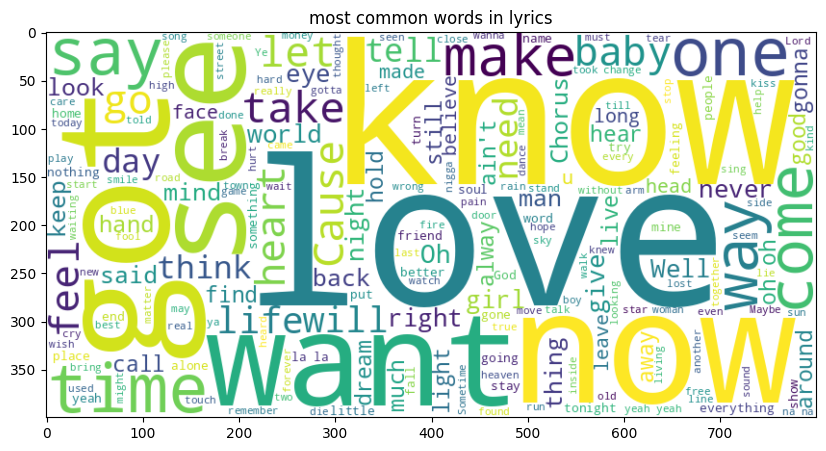

In [59]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title("most common words in lyrics")
plt.show()

In [60]:
nltk.download('punkt')
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
stop_words=set(stopwords.words("english"))

In [62]:
def preprocess_text(text):
    text=re.sub(r"[^a-zA-Z\s]","",text)
    text=text.lower()
    tokens=word_tokenize(text)
    tokens=[word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [63]:
df["cleaned_text"]=df["text"].apply(preprocess_text)

In [64]:
df.head()

,artist,song,text,cleaned_text
0,Vangelis,I'll Find My Way Home,You ask me where to begin \r\nAm I so lost in...,ask begin lost sin ask fall ill say cant tell ...
1,Natalie Cole,Not Like Mine,There ain't no arms that could ever hold you ...,aint arms could ever hold like mine ooh baby a...
2,Hank Williams Jr.,All My Rowdy Friends Are Coming Over Tonight,"I got ketchup on my blue jeans, I just burnt m...",got ketchup blue jeans burnt hand lord hard ba...
3,Oingo Boingo,Nuclear Babies,"They say radiation's harmful, \r\nIt's a fact...",say radiations harmful fact life without would...
4,Gucci Mane,Round 1 (gucci Mane Vs Jeezy),Talking: \r\n \r\nAy man check this shit out...,talking ay man check shit da rucker man nigga ...


In [65]:
tfidf_vectorizer=TfidfVectorizer(max_features=5000)
tfidf_matrix=tfidf_vectorizer.fit_transform(df["cleaned_text"])

In [66]:
cosine_sim=cosine_similarity(tfidf_matrix,tfidf_matrix)

In [67]:
def recommend_songs(song_name,cosine_sim=cosine_sim,df=df,top_n=5):
    idx=df[df["song"].str.lower()==song_name.lower()].index
    if len(idx)==0:
        return "song not found in the dataset!"
    idx=idx[0]

    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    sim_scores=sim_scores[1:top_n+1]

    song_indices=[i[0] for i in sim_scores]

    return df[["artist","song"]].iloc[song_indices]

In [68]:
df["song"][2]

'All My Rowdy Friends Are Coming Over Tonight'

In [69]:
print("\nRecommendations for the song 'Blinded by Rainbows':")
recommendations=recommend_songs('By The Way')
print(recommendations)



Recommendations for the song 'Blinded by Rainbows':
                  artist                                          song
316          Lea Salonga  I Will Always Stay This Way In Love With You
2614             Genesis                                  Never A Time
6266  Dave Matthews Band                                  Little Thing
7554      Kelly Clarkson                             Why Don't You Try
3574         Celine Dion                                 Any Other Way
